In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pyreadr
import numpy as np

In [34]:
result = pyreadr.read_r(r"C:\Users\mathi\OneDrive\Documents\Studia\SGH\R\P1\maze.RDS") # also works for RData

# done! 
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = result[None] # extract the pandas data frame 

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [21]:
x1=[]
x2=[]
y1=[]
y2=[]

for x in df.columns.tolist():
    for y in df[x].index.tolist():
        if df[x][y]:
            x1.append(x)
            y1.append(y)
        else:
            x2.append(x)
            y2.append(y)

In [ ]:
x0=0
y0=0
if not df.loc[x0,y0]:
    print('{x},{y} is a wall!'.format(x=x0,y=y0))
    for x in df.columns.tolist():
        for y in df[x].index.tolist():
            if df[x][y]:
                df.loc[x,y]='Flood'
            else:
                x2.append(x)
                y2.append(y)

In [31]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



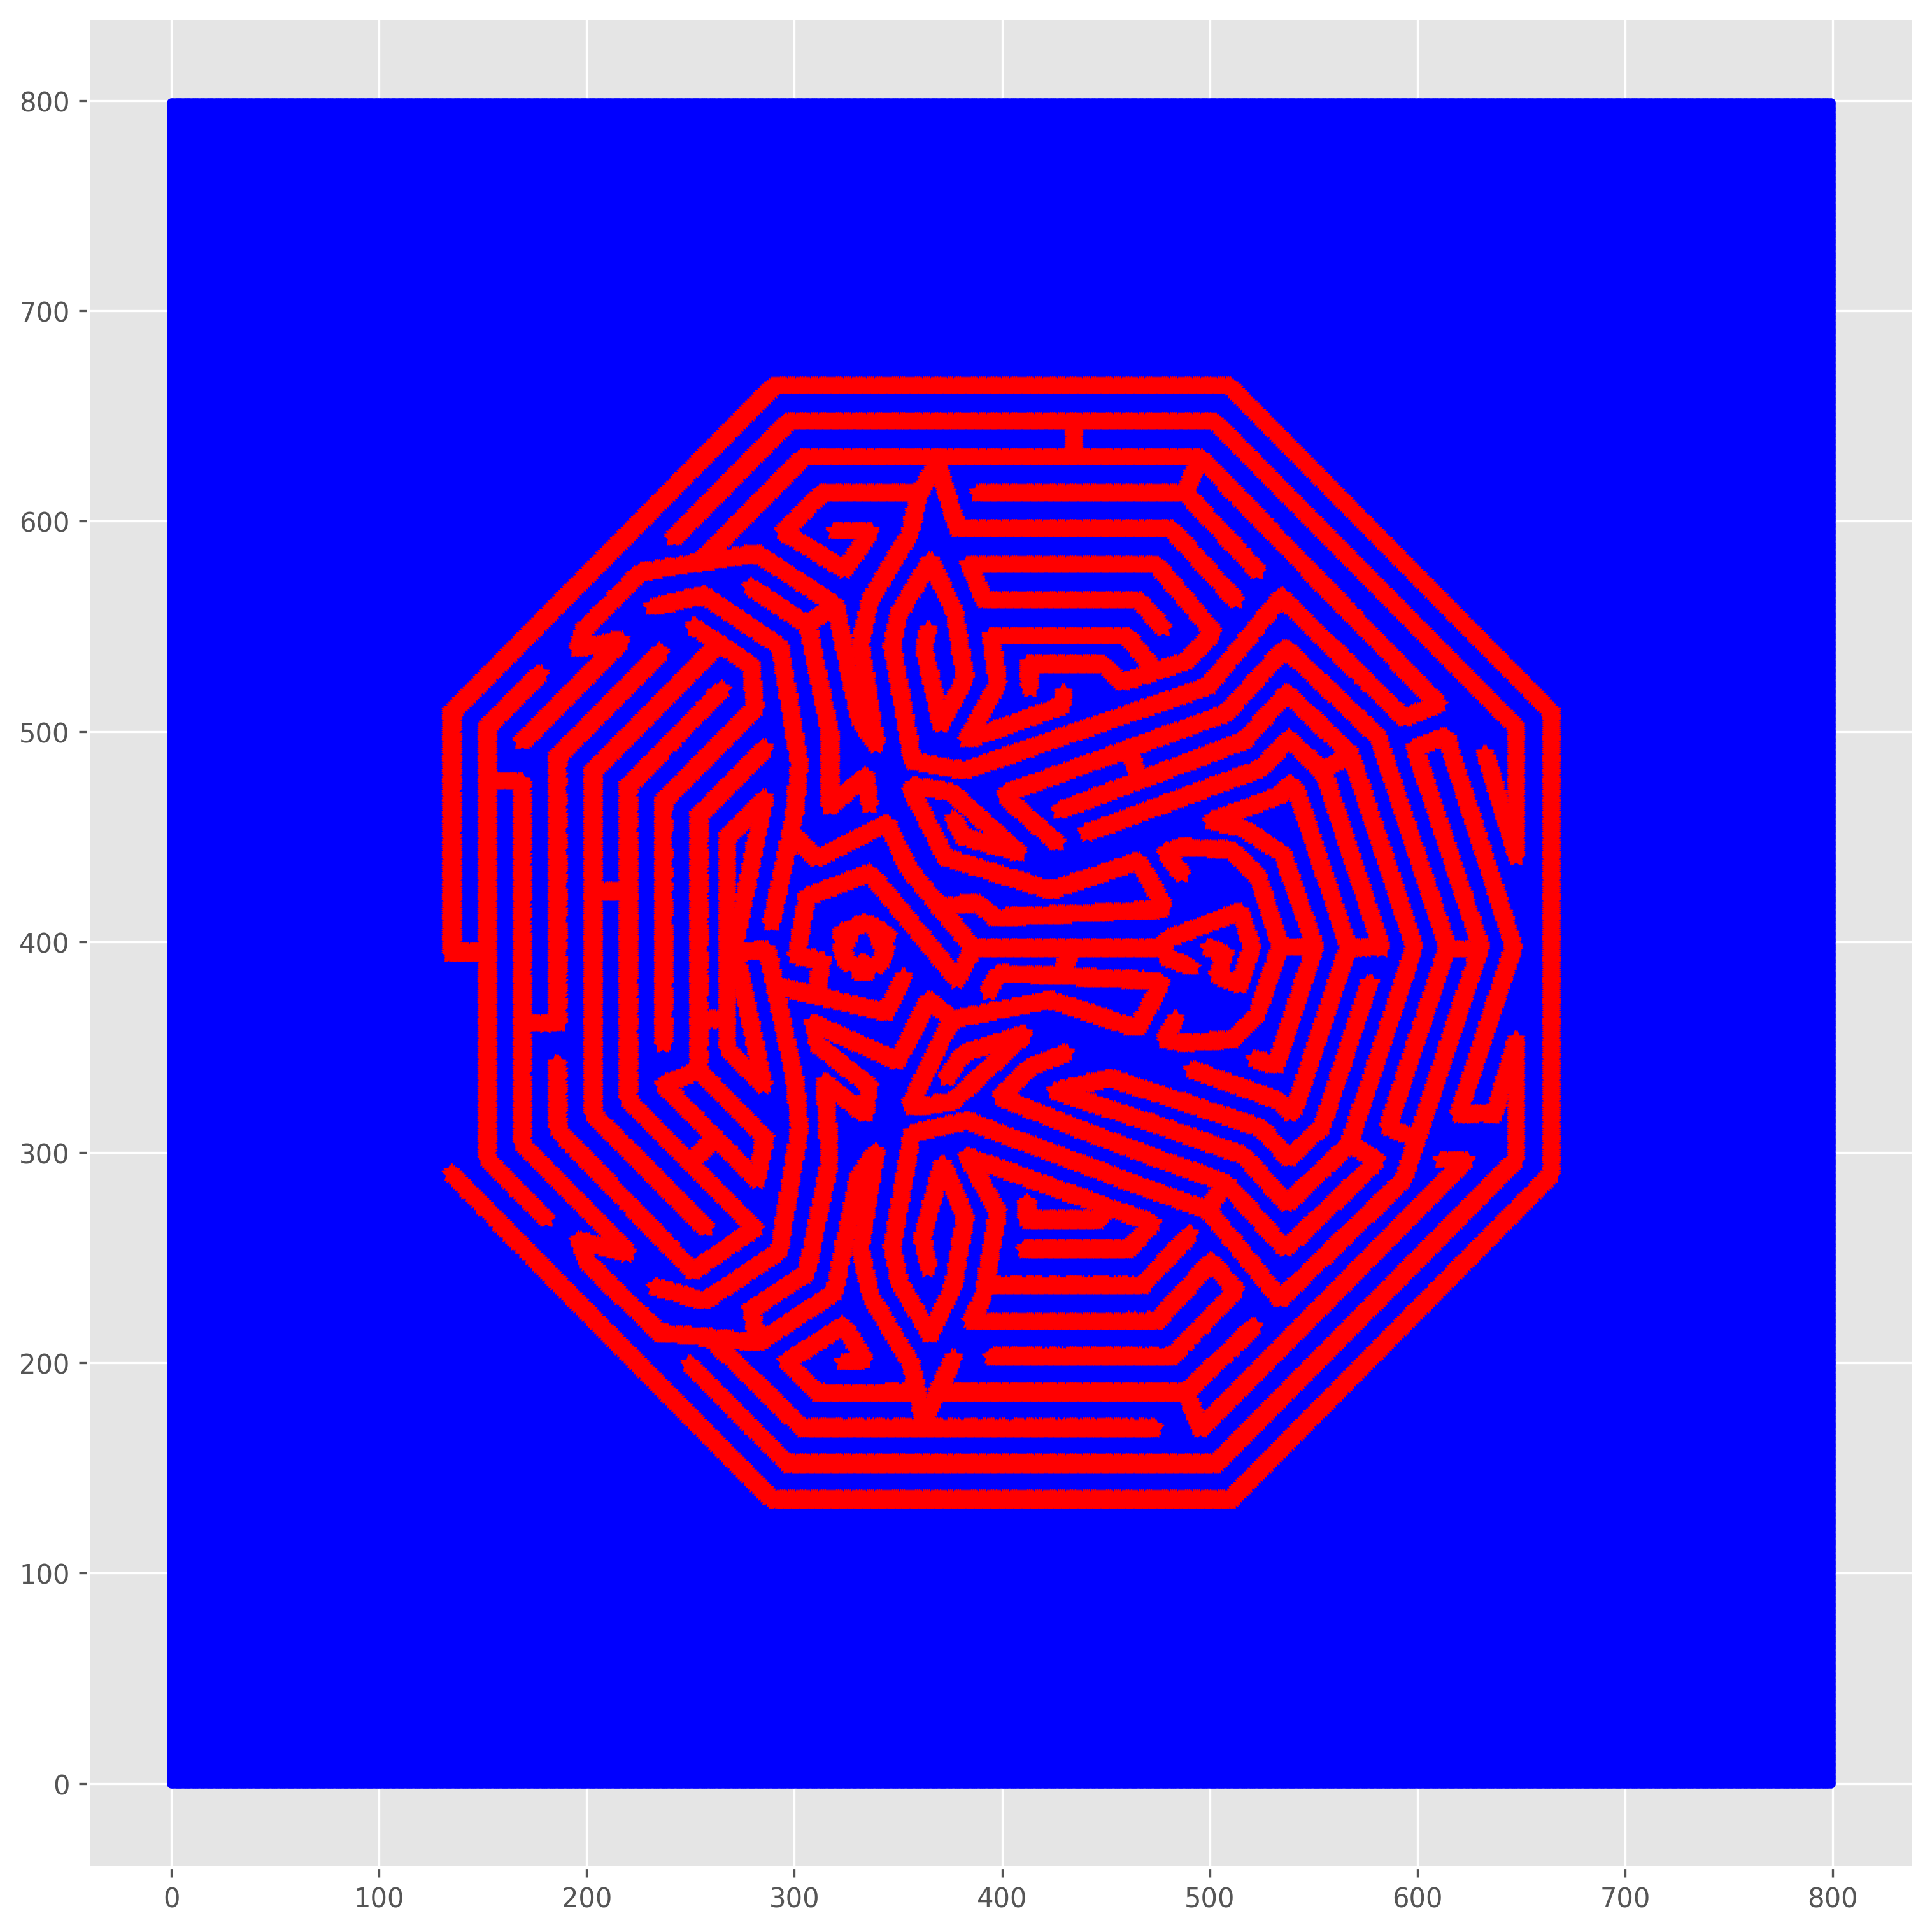

In [23]:
fig,axes=plt.subplots(figsize=(10,10),dpi=300,layout='constrained')
plt.style.use('ggplot')
axes.scatter(x1,y1,color='blue',marker='.')
axes.scatter(x2,y2,color='red',marker='*')

In [ ]:
df2=pd.DataFrame()
def fun(x):
    if x:
        return 1
    else:
        return 0
for col in df.columns.tolist():
    df2[col]= df[col].map(fun)
df2.plot()